# Car Price Prediction

In [ ]:
import numpy as np          
import pandas as pd           
import seaborn as sns         
import matplotlib.pyplot as plt 
%matplotlib inline
import pickle

In [ ]:
#dataset https://www.kaggle.com/datasets/swatikhedekar/car-price-prediction

In [ ]:
car = pd.read_csv('./car data.csv')
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
print(car['Seller_Type'].unique())
print(car['Transmission'].unique())
print(car['Owner'].unique())
print(car['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [ ]:
car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
car.duplicated().sum()       

2

In [ ]:
car[car.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [ ]:
car=car.drop_duplicates()
car.shape

(299, 9)

In [ ]:
car_dataset = car[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

car_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_dataset['No.of_year'] = 2023 - car_dataset['Year']
car_dataset.head()

<ipython-input-17-e9181d2e3ca4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_dataset['No.of_year'] = 2023 - car_dataset['Year']


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No.of_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [ ]:
car_dataset.drop(['Year'],axis=1,inplace=True)
car_dataset.head(2)

<ipython-input-18-70161b958a68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_dataset.drop(['Year'],axis=1,inplace=True)


,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No.of_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10


In [ ]:
car_dataset=pd.get_dummies(car_dataset,drop_first=True)
car_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No.of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [ ]:
car_dataset.tail()

,Selling_Price,Present_Price,Kms_Driven,Owner,No.of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
296,9.50,11.6,33988,0,7,1,0,0,1
297,4.00,5.9,60000,0,8,0,1,0,1
298,3.35,11.0,87934,0,14,0,1,0,1
299,11.50,12.5,9000,0,6,1,0,0,1
300,5.30,5.9,5464,0,7,0,1,0,1


In [ ]:
X = car_dataset.iloc[:,1:]
y = car_dataset.iloc[:,0]

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [ ]:
correlation = car_dataset.corr()
correlation

,Selling_Price,Present_Price,Kms_Driven,Owner,No.of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.876378,0.028566,-0.087880,-0.234369,0.543541,-0.531636,-0.553851,-0.348869
Present_Price,0.876378,1.000000,0.205253,0.009947,0.053563,0.464849,-0.456746,-0.511686,-0.334265
Kms_Driven,0.028566,0.205253,1.000000,0.089367,0.525714,0.173295,-0.173595,-0.101030,-0.163881
Owner,-0.087880,0.009947,0.089367,1.000000,0.181639,-0.051836,0.054102,0.123646,-0.052166
No.of_year,-0.234369,0.053563,0.525714,0.181639,1.000000,-0.056469,0.052197,0.036820,-0.003434
Fuel_Type_Diesel,0.543541,0.464849,0.173295,-0.051836,-0.056469,1.000000,-0.979104,-0.345882,-0.086264
Fuel_Type_Petrol,-0.531636,-0.456746,-0.173595,0.054102,0.052197,-0.979104,1.000000,0.353865,0.078700
Seller_Type_Individual,-0.553851,-0.511686,-0.101030,0.123646,0.036820,-0.345882,0.353865,1.000000,0.058669
Transmission_Manual,-0.348869,-0.334265,-0.163881,-0.052166,-0.003434,-0.086264,0.078700,0.058669,1.000000


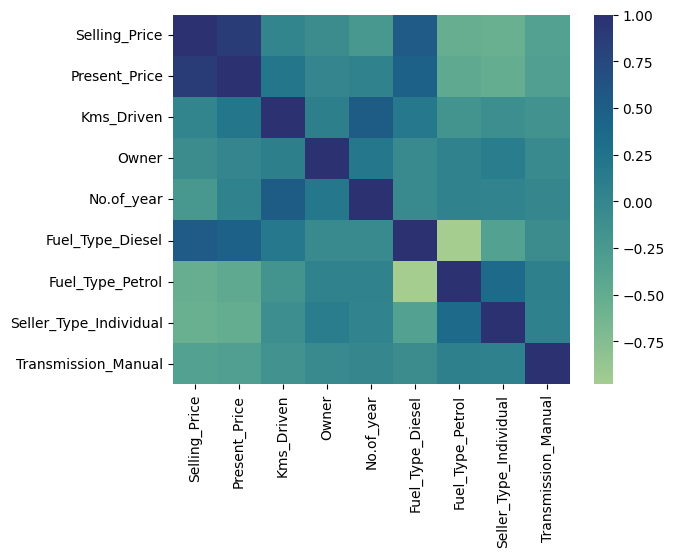

In [ ]:
sns.heatmap(correlation,cmap="crest") #coolwarm=warm color in colormap
plt.show()

In [ ]:
print(model.feature_importances_)


[0.44379566 0.04104439 0.00128005 0.08459253 0.07687725 0.02363444
 0.23566724 0.09310843]


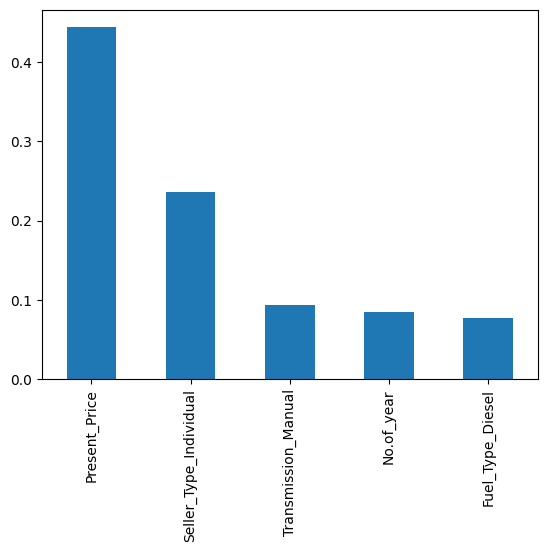

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='bar')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_Random = RandomForestRegressor()

In [ ]:
rf_Random.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
preds=rf_Random.predict(X_test)
preds

array([ 0.5968,  6.5105,  0.1988,  0.5496,  0.2683,  8.2422, 22.2633,
        4.8005,  2.817 ,  4.366 , 15.8281,  0.1982,  4.4715,  3.184 ,
        6.2926,  1.855 ,  8.7675,  0.4484,  2.667 ,  5.83  ,  2.948 ,
        0.2302,  2.588 ,  2.9816,  9.9297,  0.2814, 10.3855,  2.6205,
        0.5517,  0.8177,  5.2435,  0.3783, 20.75  ,  6.4689,  3.6695,
        0.4328,  8.9825,  0.769 ,  0.5153,  0.3164,  2.8755,  4.3895,
        7.069 ,  7.1135,  5.9345,  9.4271,  1.1635,  1.4855,  4.6053,
        0.451 ,  4.683 ,  4.414 , 19.1691,  4.95  ,  2.824 ,  1.9212,
        1.0345,  5.288 , 10.4035,  0.4627])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
mse = mean_squared_error(y_test, preds)
mse

2.7580495623333343

In [ ]:
rmse = mean_squared_error(y_test, preds, squared = False)
rmse

1.6607376560833846

In [ ]:
mape = mean_absolute_percentage_error(y_test, preds)
mape

0.1624685720447698